In [3]:
import h5py
import glob
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [5]:
! ls ../

CMSDAS2024_Trigger_Exercise
CMSSW_10_6_12
CMSSW_11_3_4
CMSSW_9_4_7
GENTUTORIAL
H_AA_4Tau
H_AA_CLuster_jupyter_notebooks
IMG_Upsilon_ToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_validation.parquet
JMEHATS2023
ML_training_script
Pytorch_VE
README.txt
REAM_ME_FOR_GPU.TX
RecoE2E
TAU_HATS2023
TauTauLongExercise
analysis
boosted_tau_classifier
conversion_plot_scripts
data_Run2018B_Tau_RAW_FA163E1B5CE1.root
dockeImage
editThisCommand.py
file_list_aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1.txt
gpuscratch
hats_2023_gen
jupitor_project
jupy.sh
mass_reg_with_modified_mass_scale
mass_regression_models_for_validation_tests_using_data_v2
mass_trainer_aToTauTau_m1p2To17p2_less_unphysical
mass_trainer_aToTauTau_m1p2To17p2_unphysical_over_populated_less_data_lowerUnPhysical_range
mass_trainer_aToTauTau_m3p6To17p2_with_newModel_noBN
mass_trainer_aToTauTau_with_full_massrange
multiple_gpu_ML_code
output_99.root
plot_A_2Tau_Gen_Info_from_rootfile_usig_up

In [6]:
files1 = glob.glob("../signal_classifier/13_channels_classifier_ResNet_3/INFERENCE_DATA/*")
print(files1[0])
# files2 = glob.glob("/home/bbbam/boosted_tau_classifier_13ch/INFERENCE_DATA/*/*")
# print(len(files1),len(files2))
# print(files1[-1],files2[-1])

../signal_classifier/13_channels_classifier_ResNet_3/INFERENCE_DATA/metrics_epoch10_auc0.9319.hdf5


In [7]:
def roc_curve(file_path1):
    print(file_path1)
    # print(file_path2)
    with h5py.File(file_path1, 'r') as file1:
        fpr1 = file1['fpr'][()]  
        tpr1 = file1['tpr'][()]
        y_pred1 = file1['y_pred'][()]
        y_truth1 = file1['y_truth'][()]
    # with h5py.File(file_path2, 'r') as file2:
    #     fpr2 = file2['fpr'][()]  
    #     tpr2 = file2['tpr'][()]
    #     y_pred2 = file2['y_pred'][()]
    #     y_truth2 = file2['y_truth'][()]
        
    fig, ax = plt.subplots()
    
    # plt.plot(fpr2, tpr2, color='red', lw=2, label=f'ROC curve 13 ch: AUC={np.round(auc(fpr2, tpr2),4)}')
    plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve 13 ch: AUC={np.round(auc(fpr1, tpr1),4)}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show()

   

../signal_classifier/13_channels_classifier_ResNet_3/INFERENCE_DATA/metrics_epoch10_auc0.9319.hdf5


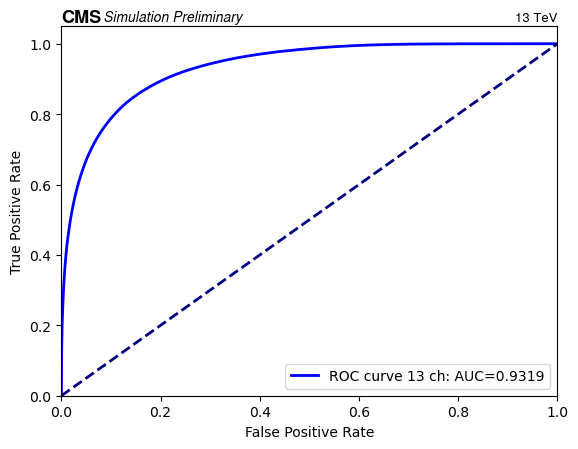

In [8]:
roc_curve(files1[-1])

Accuracy: 85.13%
Precision: 85.41%
Recall: 84.72%
F1 Score: 85.06%
Confusion Matrix:
[[618092 104538]
 [110343 611826]]


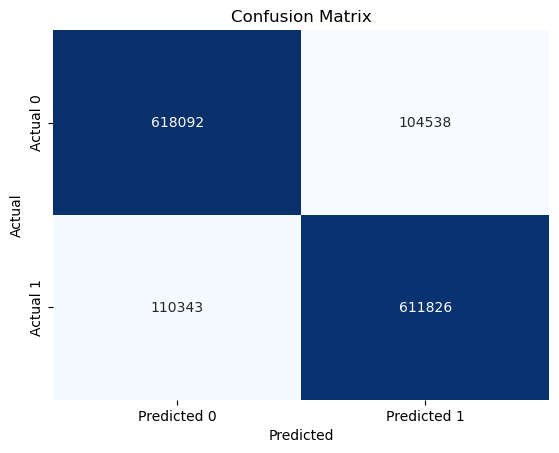

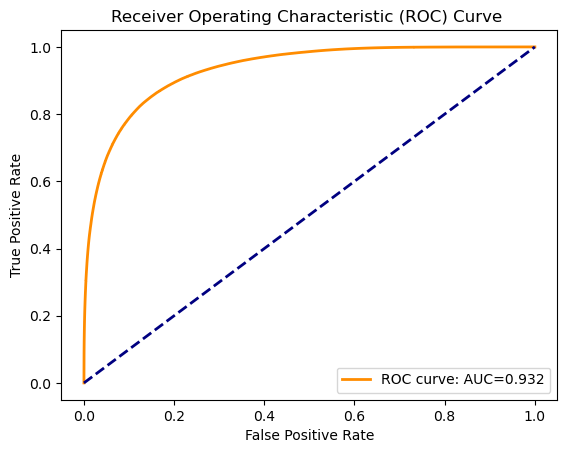

In [9]:

# Example true and predicted values
with h5py.File(files1[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
y_pred = np.squeeze(np.array([1 if true > 0.5 else 0 for true in y_pred]))


        
#Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate ROC-AUC score

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


In [6]:
# Example true and predicted values
with h5py.File(files2[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
y_pred = np.squeeze(np.array([1 if true > 0.5 else 0 for true in y_pred]))


        
#Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate ROC-AUC score

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


NameError: name 'files2' is not defined

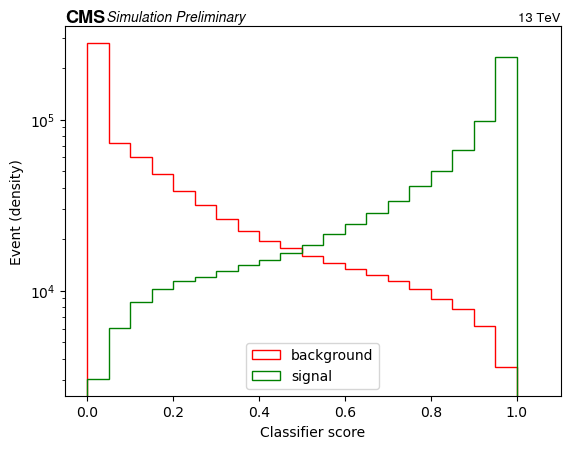

In [12]:
sig , back = [], []
with h5py.File(files1[0], 'r') as file1:
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
for i in range(len(y_true)):
    if y_true[i]==1: 
        sig.append(y_pred[i])
    else:
        back.append(y_pred[i])
fig, ax = plt.subplots()
plt.hist(back, bins = np.arange(0,1.1,0.05),histtype='step', density=False, log=True, color='r',label='background')
plt.hist(sig, bins = np.arange(0,1.1,0.05),histtype='step', density=False, log=True,color='g',label='signal')
plt.xlabel('Classifier score')
plt.ylabel('Event (density)')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show()

In [24]:
len(y_true[y_true==0])

424661